# REVIEWS AS A PREDICTOR OF SALES
###### By Rachel Nord, DS-SEA-07

## Background
Reviews drive ratings.  We know that products that have reviews and have high average rating of reviews sell better than those that don’t.  

## Problem Statement
Can we use product reviews as a predictor for sales at REI? 
Do product Reviews affect sales?  For some product types/price points more than others?
Furthermore, are there certain key words that drive an increase in orders for a given product?

My hypothosis is that when the number of reviews increases by X, the number of orders placed will increase by Y.

## Data

### Data Import
Pulled from our internal database: review count, average review, number of product views, and number of orders placed for all products, 2017 to date.  The dimensions of this data are by day, and by merchandise hierarchy: Shop, Department, Class, Subclass.  I also calculated order conversion (number of orders / number of views) and 'gross reviews' (review count * average review).

### Pre-processing Steps Taken
In the Review Count and Review Score columns, all 'NaN' were replaced with '0'.  Review Score and Product were converted to numbers.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 14


In [2]:
# read in data
path = '/Users/rnord/GA Data Science/temp_repos/DS-SEA-07/project/'
url = path + 'Bazaar_by_product_TRAFFIC.csv'
prod = pd.read_csv(url, delimiter = '|')

# Add Standard Deviation
prod['STD'] = np.sqrt(prod['VARIANCE_'])

#Look at latest month
prod_oct = prod[prod['MONTH_CODE'] == 201710]

prod_oct.head()

,MONTH_CODE,PRODUCT,SUBCLASS_DESC,CLASS_DESC,DEPARTMENT_DESC,SHOP_DESC,VISITS,ORDERS,CONVERSION,INDEX,...,NUM_UPLOADED_VIDEOS,PRODUCT.1,PRICE,REVIEWS_5,REVIEWS_4,REVIEWS_3,REVIEWS_2,REVIEWS_1,VARIANCE_,STD
1,201710,103618,WOMEN'S SNOWSPORTS C,CYCLE-SNOW-PADDLE,REI GARAGE,REI GARAGE,9,1,0.111111,48714,...,0,103618,42.73,0.00,0.00,0.00,0.00,0.00,0.0000,0.000000
13,201710,772529,VISIBILITY,PREVENTION / TRAINING,OUTDOOR TRAINING HARDGOODS,OUTDOOR CROSS TRAINING,715,22,0.030769,2216,...,0,772529,29.95,20.16,5.12,2.88,1.92,1.92,81.0398,9.002211
14,201710,121366,YOGA PANTS,WOMEN'S YOGA BOTTOMS,WOMEN'S OUTDOOR TRAINING APPAREL,OUTDOOR CROSS TRAINING,390,9,0.023077,45211,...,0,121366,79.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.000000
16,201710,103040,GUIDES,BOOKS,OUTDOOR IMPULSE,OUTDOOR ESSENTIALS,24,1,0.041667,51859,...,0,103040,24.95,0.00,0.00,0.00,0.00,0.00,0.0000,0.000000
17,201710,873853,SNOW SOCKS,MULTI-SPORT SOCKS,SOCKS,"HIKE & LIFESTYLE FOOTWEAR, SOCKS, BASICS",174,12,0.068966,22729,...,0,873853,26.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.000000


In [3]:
print prod_oct.dtypes

MONTH_CODE                                 int64
PRODUCT                                    int64
SUBCLASS_DESC                             object
CLASS_DESC                                object
DEPARTMENT_DESC                           object
SHOP_DESC                                 object
VISITS                                     int64
ORDERS                                     int64
CONVERSION                               float64
INDEX                                      int64
PRODUCT_NAME                              object
PRODUCT_ID                                 int64
CATEGORY                                  object
AVERAGE_OVERALL_RATING                   float64
TOTAL_SUBMITTED__REVIEWS                   int64
TOTAL_SUBMITTED__RATINGS_ONLY_REVIEWS      int64
PCT_RECOMMEND_TO_A_FRIEND                float64
AVERAGE_EST_REVIEW_WORD_COUNT              int64
PCT_5_STAR                               float64
PCT_4_STAR                               float64
PCT_3_STAR          

### Response Variable
The response variable that was tested was `Order Conversion (Orders / Views)` and `Orders`.

## Features Used (and why)
1. Average Review Score
2. Total number of reviews
3. Merchandise classification (Shop/Description/Class/Subclass)

For all Shops, the products primarily had either had no reviews, or 5 star reviews.

### HISTOGRAMS - By SHOP

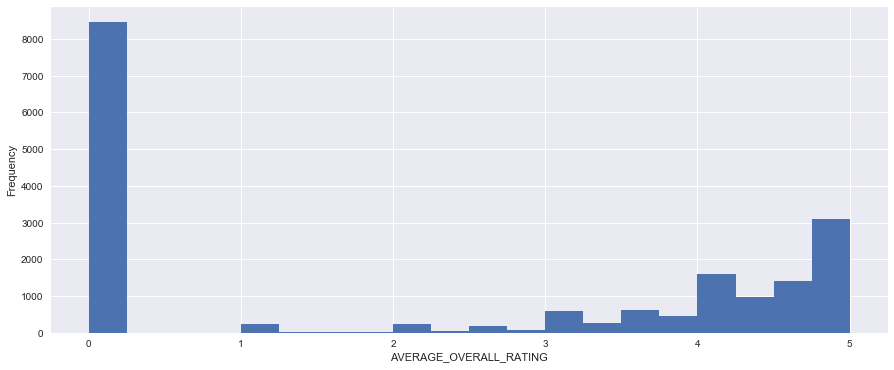

In [4]:
# Average Overall Rating
prod_oct.AVERAGE_OVERALL_RATING.plot(kind='hist', bins=20)
plt.xlabel('AVERAGE_OVERALL_RATING')
plt.ylabel('Frequency')

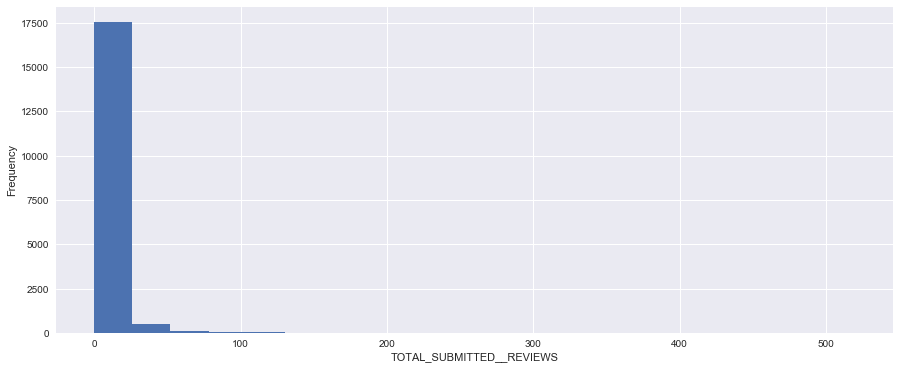

In [5]:
# Total Submitted Reviews

prod_oct.TOTAL_SUBMITTED__REVIEWS.plot(kind='hist', bins=20)
plt.xlabel('TOTAL_SUBMITTED__REVIEWS')
plt.ylabel('Frequency')

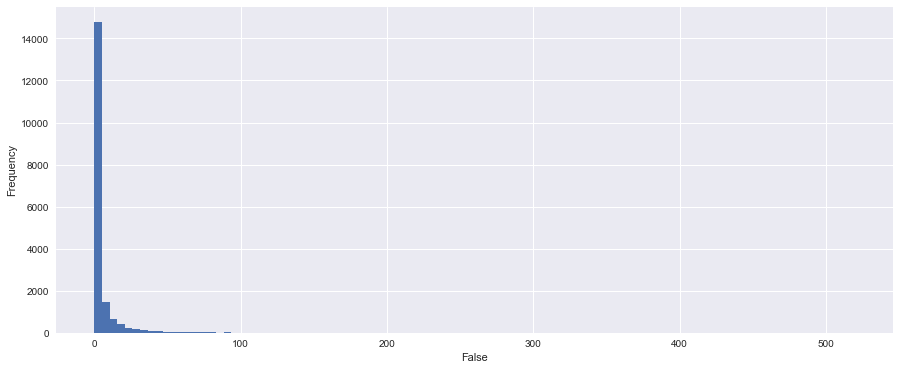

In [6]:
# Total Submitted Reviews

prod_oct.TOTAL_SUBMITTED__REVIEWS.plot(kind='hist', bins=100)
plt.xlabel(['AVERAGE_EST_REVIEW_WORD_COUNT'] < 100)
plt.ylabel('Frequency')

## Correlations

I ran a correlation report to see if there was any sort of correlation between the various features available and order conversion.  

Based on the below heatmap, the strongest correlation with orders and order conversion are percent of reviews recommended to friends, total reviews, especially the number of 5-star reviews, total helpfulness votes.

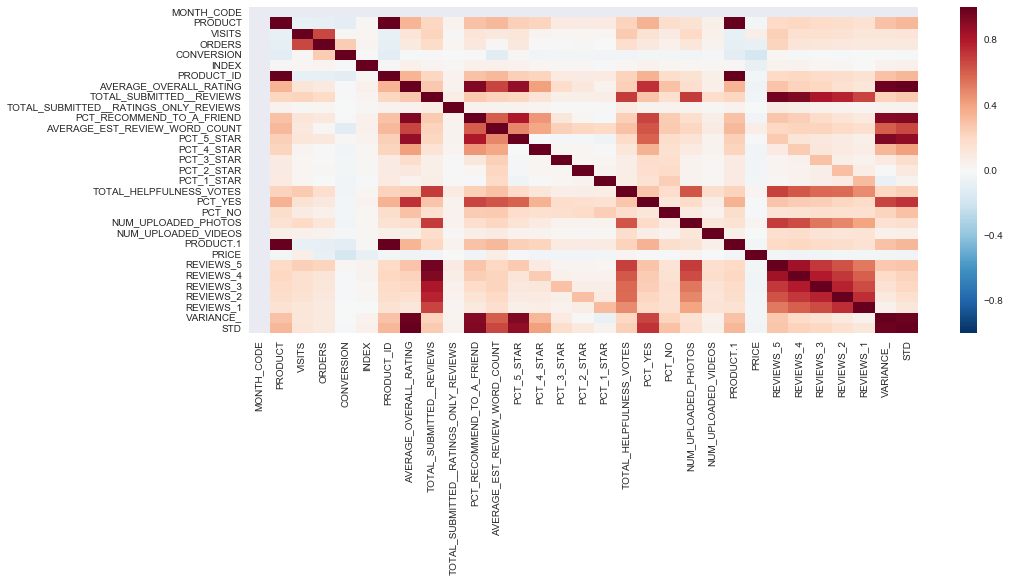

In [7]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(prod_oct.corr())

In [11]:
# create dummy variables for shop
shop_dummies = pd.get_dummies(prod_oct.SHOP_DESC, prefix='shop')

# print 5 random rows
shop_dummies.sample(n=5, random_state=1)

,shop_APPAREL,shop_CAMPING,shop_CLIMBING,shop_CYCLING,"shop_HIKE & LIFESTYLE FOOTWEAR, SOCKS, BASICS",shop_MISCELLANEOUS,shop_OUTDOOR CROSS TRAINING,shop_OUTDOOR ESSENTIALS,shop_REI GARAGE,shop_SNOWSPORTS,shop_TRAVEL,shop_WATERSPORTS
56311,0,0,0,0,0,0,0,1,0,0,0,0
45272,0,0,0,0,0,0,0,0,1,0,0,0
74790,0,0,0,0,0,0,1,0,0,0,0,0
39673,0,0,0,0,1,0,0,0,0,0,0,0
73475,0,0,0,0,0,0,0,1,0,0,0,0


In [12]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
prod_oct = pd.concat([prod_oct, shop_dummies], axis=1)

# print 5 random rows
prod_oct.sample(n=5, random_state=1)


,MONTH_CODE,PRODUCT,SUBCLASS_DESC,CLASS_DESC,DEPARTMENT_DESC,SHOP_DESC,VISITS,ORDERS,CONVERSION,INDEX,...,shop_CLIMBING,shop_CYCLING,"shop_HIKE & LIFESTYLE FOOTWEAR, SOCKS, BASICS",shop_MISCELLANEOUS,shop_OUTDOOR CROSS TRAINING,shop_OUTDOOR ESSENTIALS,shop_REI GARAGE,shop_SNOWSPORTS,shop_TRAVEL,shop_WATERSPORTS
56311,201710,790592,SNACK BARS,BARS,FOOD,OUTDOOR ESSENTIALS,58,5,0.086207,39962,...,0,0,0,0,0,1,0,0,0,0
45272,201710,122278,SNOWSHOES,CYCLE-SNOW-PADDLE,REI GARAGE,REI GARAGE,437,18,0.041190,44694,...,0,0,0,0,0,0,1,0,0,0
74790,201710,898239,TOPS,WOMEN'S TOPS,WOMEN'S UNDERWEAR,OUTDOOR CROSS TRAINING,129,7,0.054264,62095,...,0,0,0,0,1,0,0,0,0,0
39673,201710,747206,NON WATERPROOF,WOMEN'S HIKING MID HEIGHT,HIKING FOOTWEAR,"HIKE & LIFESTYLE FOOTWEAR, SOCKS, BASICS",45,4,0.088889,51003,...,0,0,1,0,0,0,0,0,0,0
73475,201710,858583,GUIDES,BOOKS,OUTDOOR IMPULSE,OUTDOOR ESSENTIALS,24,0,0.000000,27687,...,0,0,0,0,0,1,0,0,0,0


In [13]:
prod_oct.columns


Index([u'MONTH_CODE', u'PRODUCT', u'SUBCLASS_DESC', u'CLASS_DESC',
       u'DEPARTMENT_DESC', u'SHOP_DESC', u'VISITS', u'ORDERS', u'CONVERSION',
       u'INDEX', u'PRODUCT_NAME', u'PRODUCT_ID', u'CATEGORY',
       u'AVERAGE_OVERALL_RATING', u'TOTAL_SUBMITTED__REVIEWS',
       u'TOTAL_SUBMITTED__RATINGS_ONLY_REVIEWS', u'PCT_RECOMMEND_TO_A_FRIEND',
       u'AVERAGE_EST_REVIEW_WORD_COUNT', u'PCT_5_STAR', u'PCT_4_STAR',
       u'PCT_3_STAR', u'PCT_2_STAR', u'PCT_1_STAR', u'TOTAL_HELPFULNESS_VOTES',
       u'PCT_YES', u'PCT_NO', u'NUM_UPLOADED_PHOTOS', u'NUM_UPLOADED_VIDEOS',
       u'PRODUCT.1', u'PRICE', u'REVIEWS_5', u'REVIEWS_4', u'REVIEWS_3',
       u'REVIEWS_2', u'REVIEWS_1', u'VARIANCE_', u'STD', u'shop_APPAREL',
       u'shop_CAMPING', u'shop_CLIMBING', u'shop_CYCLING',
       u'shop_HIKE & LIFESTYLE FOOTWEAR, SOCKS, BASICS', u'shop_MISCELLANEOUS',
       u'shop_OUTDOOR CROSS TRAINING', u'shop_OUTDOOR ESSENTIALS',
       u'shop_REI GARAGE', u'shop_SNOWSPORTS', u'shop_TRAVEL',
      

In [14]:
# create a list of features
feature_cols = ['AVERAGE_OVERALL_RATING', 'TOTAL_SUBMITTED__REVIEWS', 
                'TOTAL_SUBMITTED__RATINGS_ONLY_REVIEWS', 'PCT_RECOMMEND_TO_A_FRIEND',
                'AVERAGE_EST_REVIEW_WORD_COUNT', 'PCT_5_STAR', 'PCT_4_STAR', 'PCT_3_STAR', 'PCT_2_STAR', 'PCT_1_STAR', 
                'PCT_YES', 'PCT_NO', 'NUM_UPLOADED_PHOTOS', 'NUM_UPLOADED_VIDEOS', 'PRICE', 'REVIEWS_5', 
                'REVIEWS_4', 'REVIEWS_3', 'REVIEWS_2', 'REVIEWS_1', 'VARIANCE_', 'STD', 'shop_APPAREL', 'shop_CAMPING', 
                'shop_CLIMBING', 'shop_CYCLING', 'shop_HIKE & LIFESTYLE FOOTWEAR, SOCKS, BASICS', 'shop_MISCELLANEOUS', 
                'shop_OUTDOOR CROSS TRAINING', 'shop_OUTDOOR ESSENTIALS', 'shop_REI GARAGE', 'shop_SNOWSPORTS', 'shop_TRAVEL', 
                'shop_WATERSPORTS']

prod_oct[feature_cols].dtypes

AVERAGE_OVERALL_RATING                           float64
TOTAL_SUBMITTED__REVIEWS                           int64
TOTAL_SUBMITTED__RATINGS_ONLY_REVIEWS              int64
PCT_RECOMMEND_TO_A_FRIEND                        float64
AVERAGE_EST_REVIEW_WORD_COUNT                      int64
PCT_5_STAR                                       float64
PCT_4_STAR                                       float64
PCT_3_STAR                                       float64
PCT_2_STAR                                       float64
PCT_1_STAR                                       float64
PCT_YES                                          float64
PCT_NO                                           float64
NUM_UPLOADED_PHOTOS                                int64
NUM_UPLOADED_VIDEOS                                int64
PRICE                                            float64
REVIEWS_5                                        float64
REVIEWS_4                                        float64
REVIEWS_3                      

In [15]:
# We have created our X (feature matrix) and Y (response vector so now lets:
# import our chosen estimator, instantiate it into a variable, fit the model with the X and y

X = prod_oct[feature_cols]
y = prod_oct['ORDERS']

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_


5.82686471781
[ -5.26552356e+01   3.03166251e+00   9.13249955e-01   6.66304928e+00
  -4.09352609e-02   2.56868026e+02   2.02791826e+02   1.45170906e+02
   9.79869520e+01   4.27050793e+01   6.53581819e+00   6.47257194e+00
  -6.28115531e-01   2.64076055e+00  -3.40301591e-03  -1.49855283e+00
  -5.06061294e+00  -2.63076201e+00  -3.78273794e+00  -2.44111797e+00
  -2.38504732e-01   3.07719950e+00   2.93753747e+00  -2.74380280e+00
  -2.58135143e+00  -3.91894038e+00   2.69262963e+00  -6.12141344e+00
   1.78310327e+00  -2.87094734e+00   1.94959197e+01  -1.20987092e+00
  -3.93644050e+00  -3.52642330e+00]


In [17]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('AVERAGE_OVERALL_RATING', -52.655235583361723),
 ('TOTAL_SUBMITTED__REVIEWS', 3.0316625127679053),
 ('TOTAL_SUBMITTED__RATINGS_ONLY_REVIEWS', 0.91324995509292184),
 ('PCT_RECOMMEND_TO_A_FRIEND', 6.6630492822762193),
 ('AVERAGE_EST_REVIEW_WORD_COUNT', -0.0409352608946012),
 ('PCT_5_STAR', 256.86802636373284),
 ('PCT_4_STAR', 202.79182585372962),
 ('PCT_3_STAR', 145.17090571353927),
 ('PCT_2_STAR', 97.9869519547279),
 ('PCT_1_STAR', 42.705079260835198),
 ('PCT_YES', 6.5358181882610538),
 ('PCT_NO', 6.4725719381903586),
 ('NUM_UPLOADED_PHOTOS', -0.62811553124052466),
 ('NUM_UPLOADED_VIDEOS', 2.6407605540965311),
 ('PRICE', -0.0034030159142233174),
 ('REVIEWS_5', -1.4985528329088709),
 ('REVIEWS_4', -5.0606129439552063),
 ('REVIEWS_3', -2.6307620136855121),
 ('REVIEWS_2', -3.7827379364633344),
 ('REVIEWS_1', -2.4411179667822296),
 ('VARIANCE_', -0.23850473235924596),
 ('STD', 3.0771994992459213),
 ('shop_APPAREL', 2.9375374661557481),
 ('shop_CAMPING', -2.7438027982496616),
 ('shop_CLIMB

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **PCT_RECOMMEND_TO_A_FRIEND** is associated with an **order increase of 3.05 products**.
- Holding all other features fixed, a 1 unit increase in **PCT_YES** (answering the question 'Is this review helpful?' is associated with a **order increase of 5.80 products**.
- Holding all other features fixed, a 1 unit increase in **Pct 5-Star Reviews** is associated with a **order increase of 7.70 products**.

## Modeling

### Simple Linear Regression

In [18]:
#from sklearn.cross_validation import train_test_split # deprecated syntax
from sklearn.model_selection import train_test_split
from sklearn import metrics


# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = prod_oct[feature_cols]
    y = prod_oct['ORDERS']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))


In [19]:
train_test_split(X, y, random_state=123)

[       AVERAGE_OVERALL_RATING  TOTAL_SUBMITTED__REVIEWS  \
 9444                     0.00                         0   
 41983                    5.00                         1   
 7916                     4.50                         2   
 56308                    0.00                         0   
 61812                    0.00                         0   
 60705                    0.00                         0   
 3885                     0.00                         0   
 28055                    4.50                         2   
 18846                    0.00                         0   
 28921                    0.00                         0   
 29313                    4.50                         2   
 54222                    0.00                         0   
 20421                    0.00                         0   
 14513                    0.00                         0   
 46427                    4.00                        14   
 17260                    0.00          

## Comparing testing RMSE with null RMSE
The mean square errors of my models performed slightly better than the null RMSE.

In [20]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null


array([ 14.62885246,  14.62885246,  14.62885246, ...,  14.62885246,
        14.62885246,  14.62885246])

In [21]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

34.638422052537365

In [22]:
print train_test_rmse(['AVERAGE_OVERALL_RATING', 'PCT_RECOMMEND_TO_A_FRIEND', 'AVERAGE_EST_REVIEW_WORD_COUNT', 
                       'TOTAL_HELPFULNESS_VOTES', 'TOTAL_SUBMITTED__REVIEWS','PCT_YES', 'NUM_UPLOADED_PHOTOS', 
                       'PCT_1_STAR', 'PCT_5_STAR', 'PRICE'])
print train_test_rmse(['AVERAGE_OVERALL_RATING', 'PCT_RECOMMEND_TO_A_FRIEND', 'PCT_YES', 'NUM_UPLOADED_PHOTOS', 
                       'PCT_5_STAR'])
print train_test_rmse(['AVERAGE_EST_REVIEW_WORD_COUNT', 'TOTAL_SUBMITTED__REVIEWS', 'PRICE'])
print train_test_rmse(['PRICE', 'PCT_5_STAR'])
print train_test_rmse(['PCT_RECOMMEND_TO_A_FRIEND', 'PCT_YES', 'shop_APPAREL', 
                       'PCT_5_STAR', 'shop_REI GARAGE', 'shop_HIKE & LIFESTYLE FOOTWEAR, SOCKS, BASICS'])
print train_test_rmse(['shop_REI GARAGE', 'PCT_5_STAR', 'PCT_YES', 'PCT_RECOMMEND_TO_A_FRIEND', 
                       'shop_HIKE & LIFESTYLE FOOTWEAR, SOCKS, BASICS', 'shop_APPAREL', 'shop_OUTDOOR CROSS TRAINING', 
                       'TOTAL_SUBMITTED__REVIEWS', 'PCT_1_STAR'])
print train_test_rmse(['shop_REI GARAGE'])
print train_test_rmse(['PCT_5_STAR',  'PCT_4_STAR', 'PCT_3_STAR',  'PCT_2_STAR',  'PCT_1_STAR',  'AVERAGE_OVERALL_RATING', 
                       'shop_REI GARAGE', 'TOTAL_SUBMITTED__RATINGS_ONLY_REVIEWS', 'STD',  'TOTAL_SUBMITTED__REVIEWS',  
                       'PCT_RECOMMEND_TO_A_FRIEND',  'PCT_YES',  'shop_CAMPING',  'REVIEWS_5',  'shop_OUTDOOR ESSENTIALS', 
                       'shop_APPAREL', 'shop_HIKE & LIFESTYLE FOOTWEAR, SOCKS, BASICS',  'PRICE'])

33.5020615239
34.1368620866
33.7281385067
34.3584292632
33.5709423618
32.7690293628
34.0966532981
32.4839270411


Model produces better results than null, but would a different model yield better results?

### Polynomial Regression

In [ ]:
# Training Polynomial Regression Model
# From this link: http://www.stephacking.com/polynomial-regression-python-visualize-results-polynomial-regression/
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

In [ ]:
# Predict Result with Polynomial Regression
lin_reg.predict(poly_reg.fit_transform(X_test[0]))
lin_reg.predict(poly_reg.fit_transform(X_test[1]))

In [24]:
# Split the dataset into Training set and Test set
#from sklearn.cross_validation import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)
#RN this was done above, though slightly differently


# Training Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly_reg = PolynomialFeatures(degree = 4)


#X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X, y)




PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

#### Trying to fit this example http://www.stephacking.com/polynomial-regression-python-visualize-results-polynomial-regression/ into our linear regression model:

In [25]:
def train_test_rmse_poly(feature_cols):
    X = prod_oct[feature_cols]
    y = prod_oct['ORDERS']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    poly_reg = PolynomialFeatures(degree = 4)
    X_poly = poly_reg.fit_transform(X_train)
    poly_reg.fit(X_train, y_train)
    y_pred = poly_reg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    

In [26]:
print train_test_rmse_poly(['AVERAGE_OVERALL_RATING', 'PCT_RECOMMEND_TO_A_FRIEND', 'AVERAGE_EST_REVIEW_WORD_COUNT', 
                       'TOTAL_HELPFULNESS_VOTES', 'TOTAL_SUBMITTED__REVIEWS','PCT_YES', 'NUM_UPLOADED_PHOTOS', 
                       'PCT_1_STAR', 'PCT_5_STAR', 'PRICE'])

AttributeError: 'PolynomialFeatures' object has no attribute 'predict'